In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import serial
import datetime

/home/kelu/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
ser=serial.Serial("/dev/ttyACM0",115200,timeout=2)
ser.baudrate=115200

Check:  0 False
4000
Check:  1 False
4000
Check:  2 False
4000
Check:  3 False
4000
Check:  4 False
4000
Check:  5 False
4000
Check:  6 False
4000
Check:  7 False
4000
Check:  8 False
4000
Check:  9 False
4000


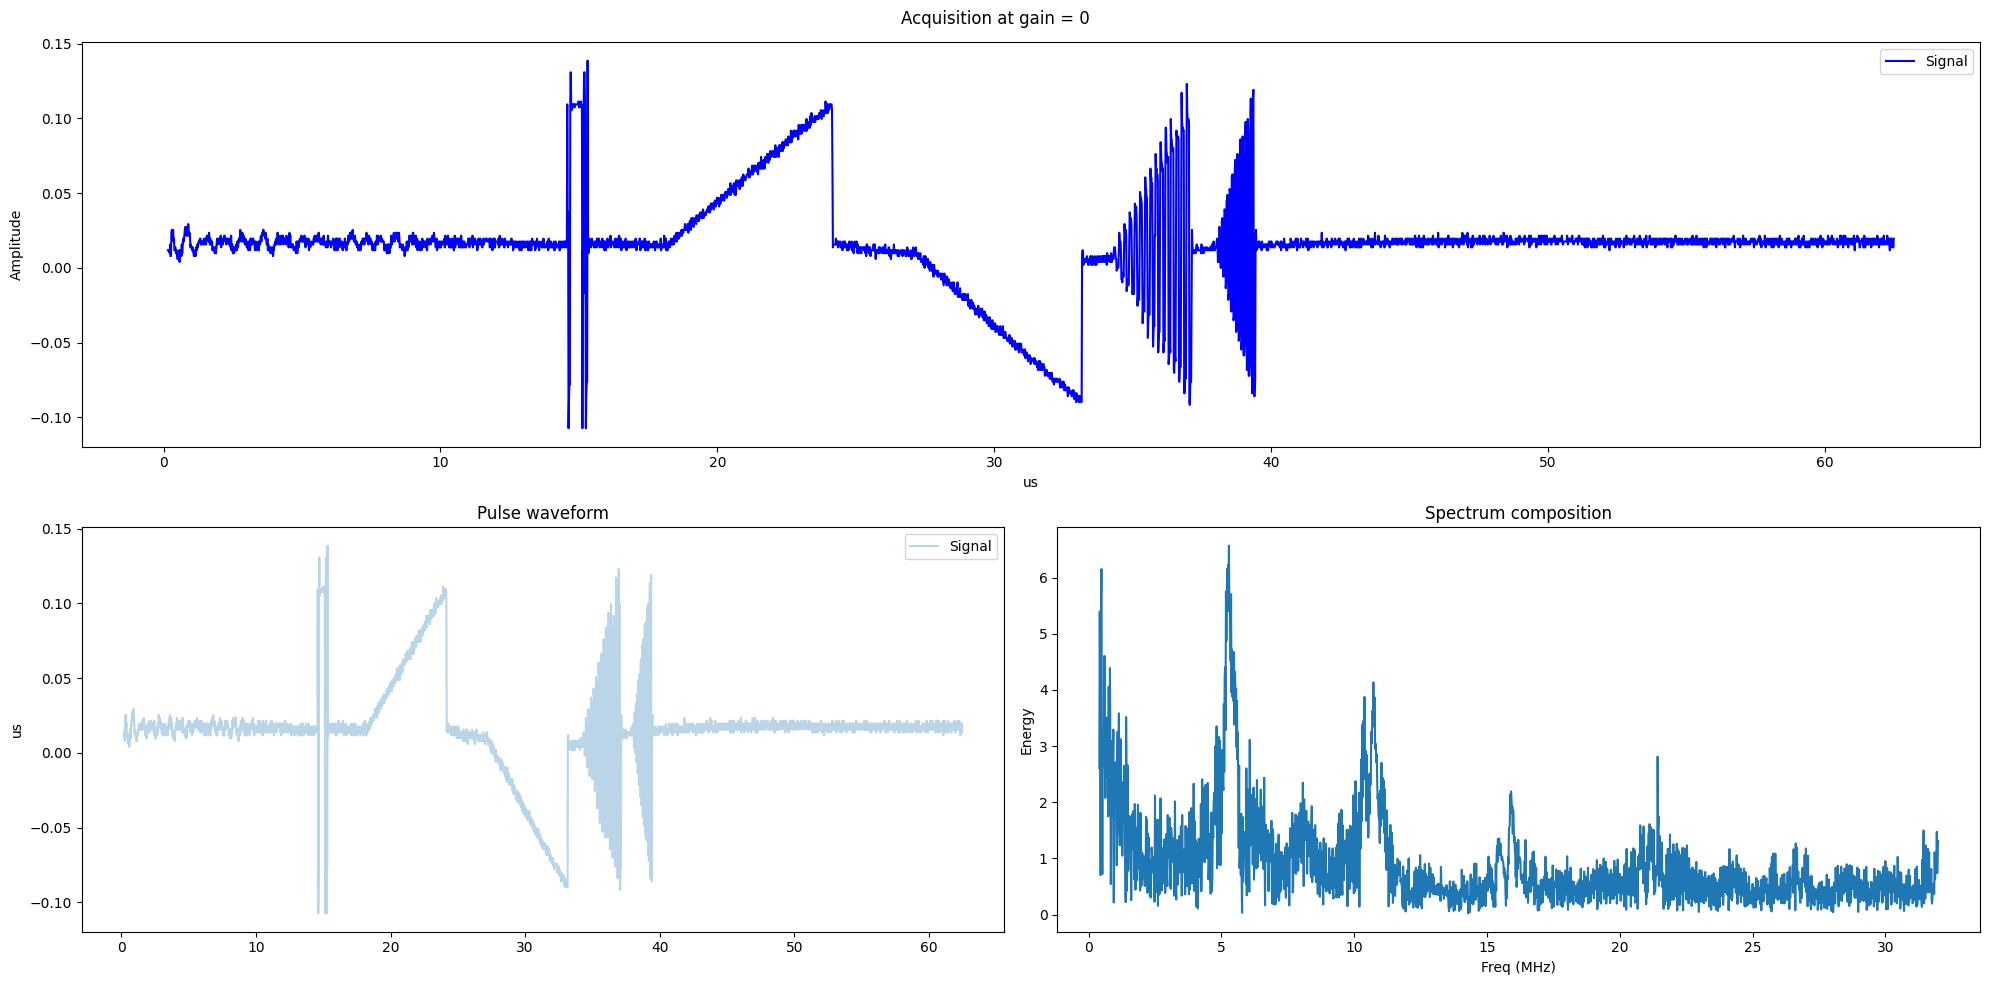

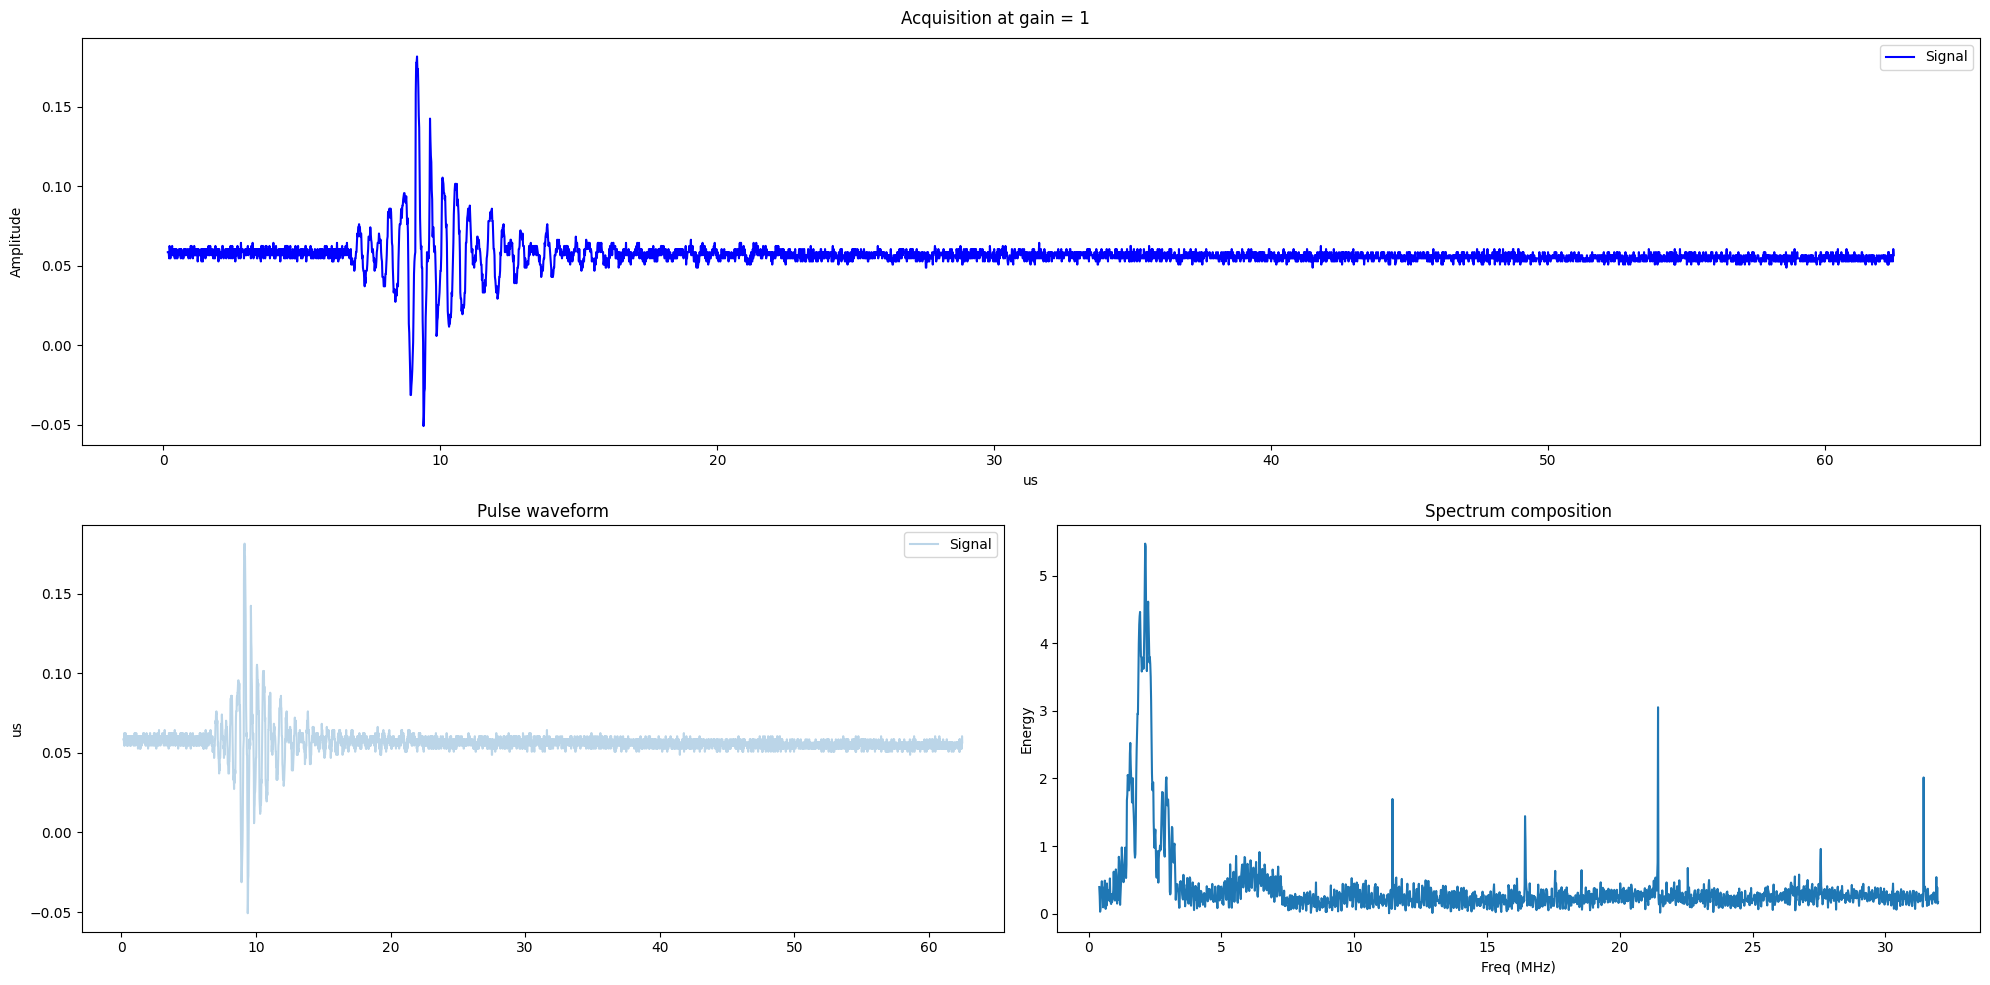

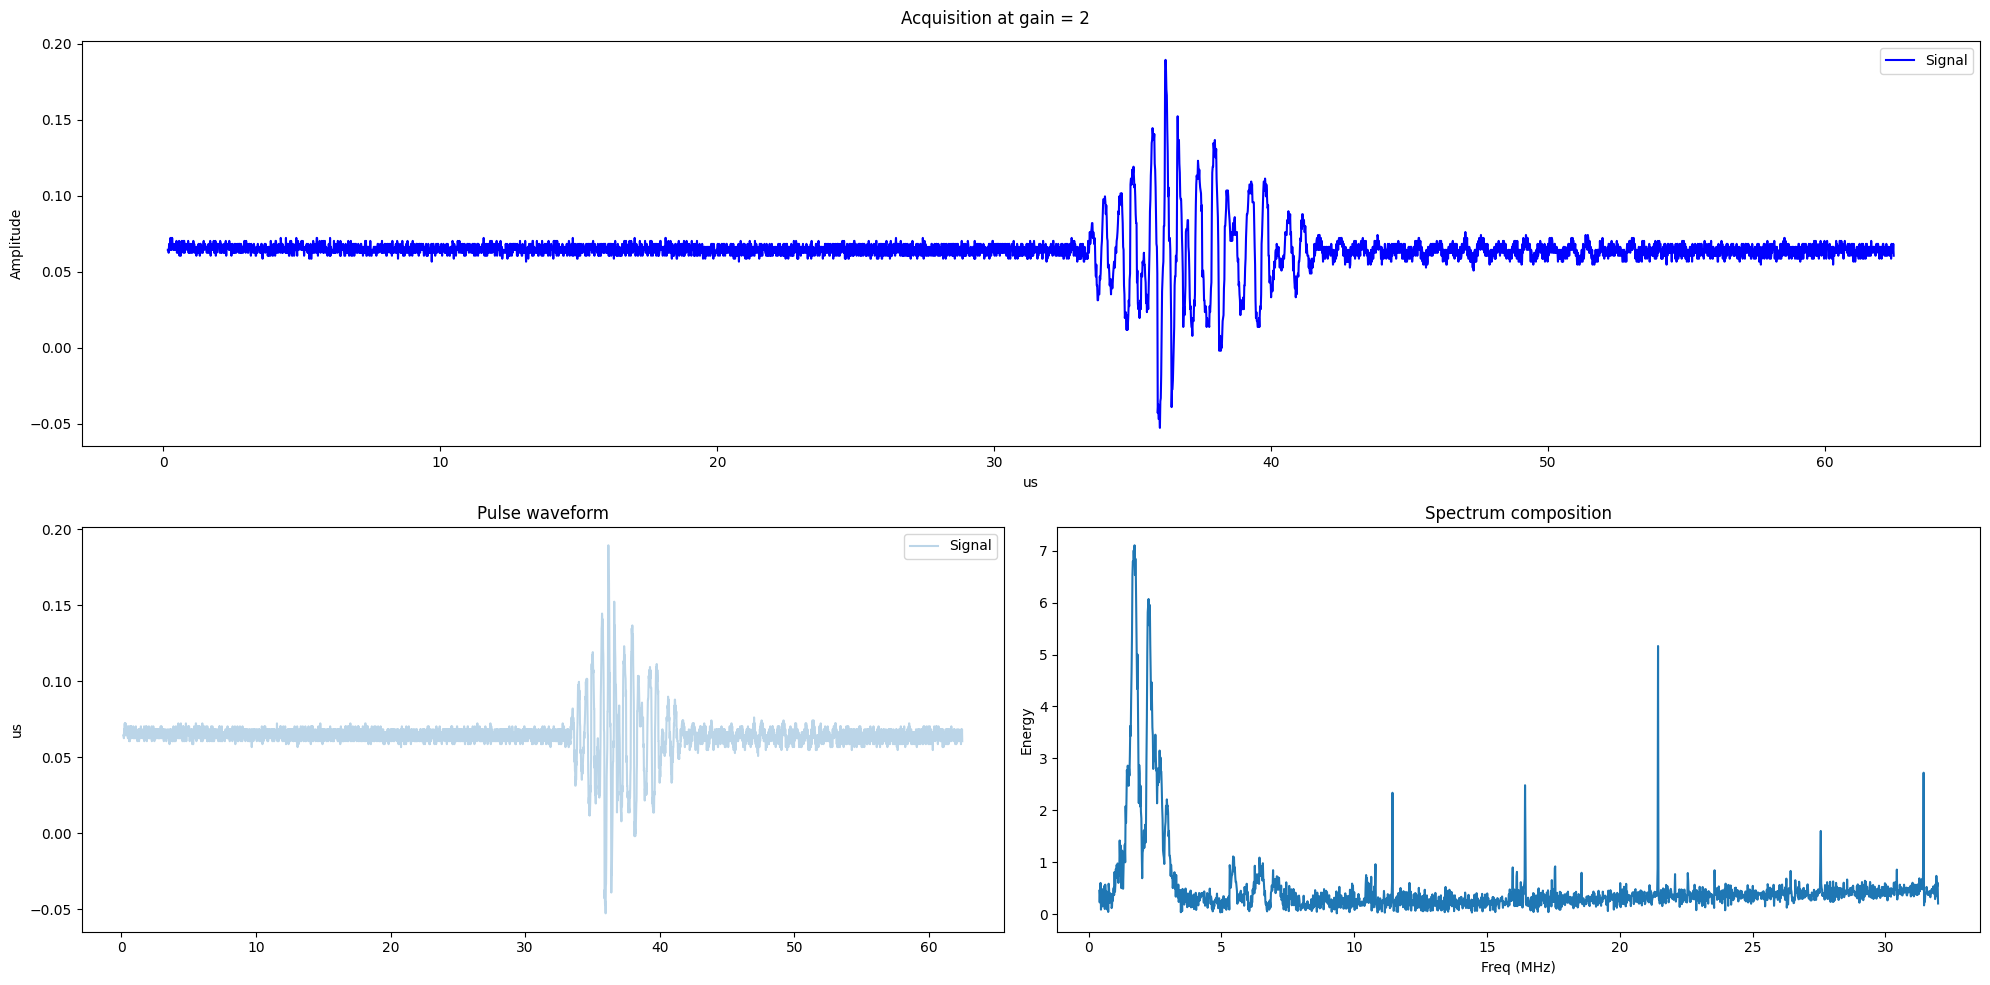

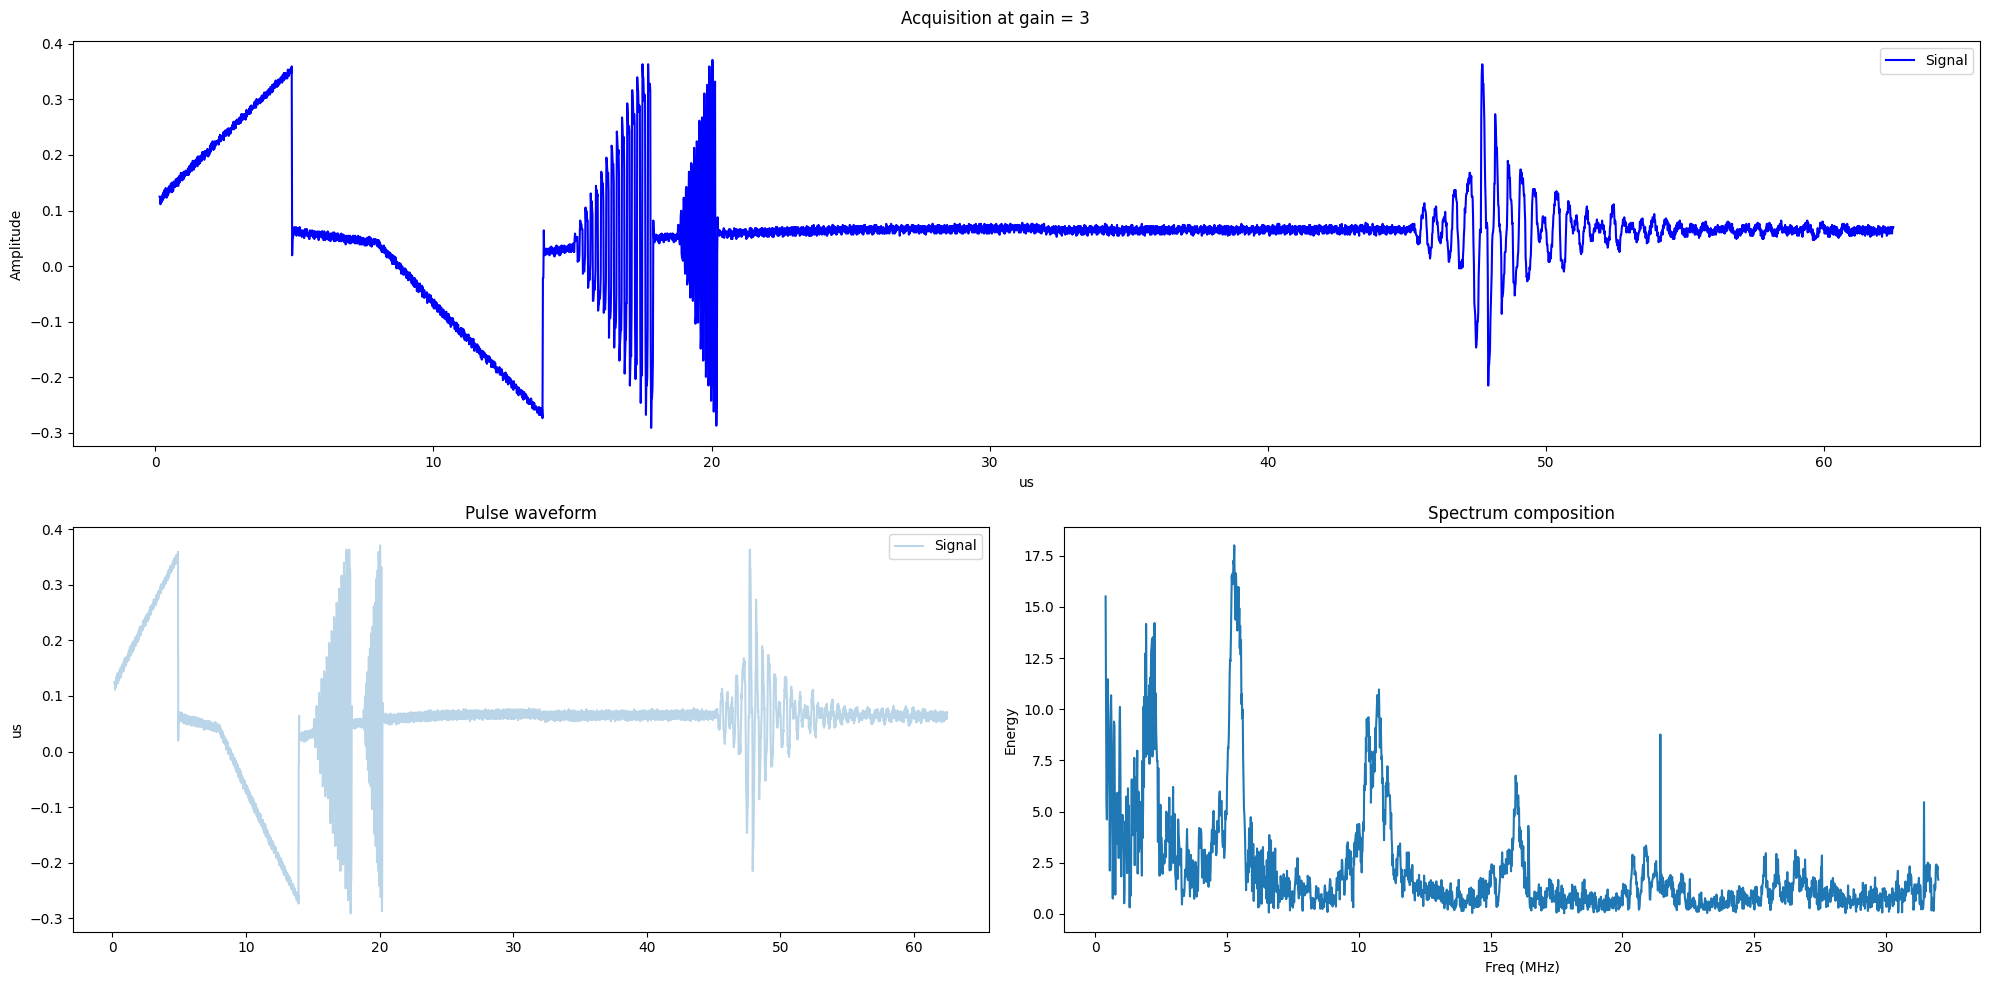

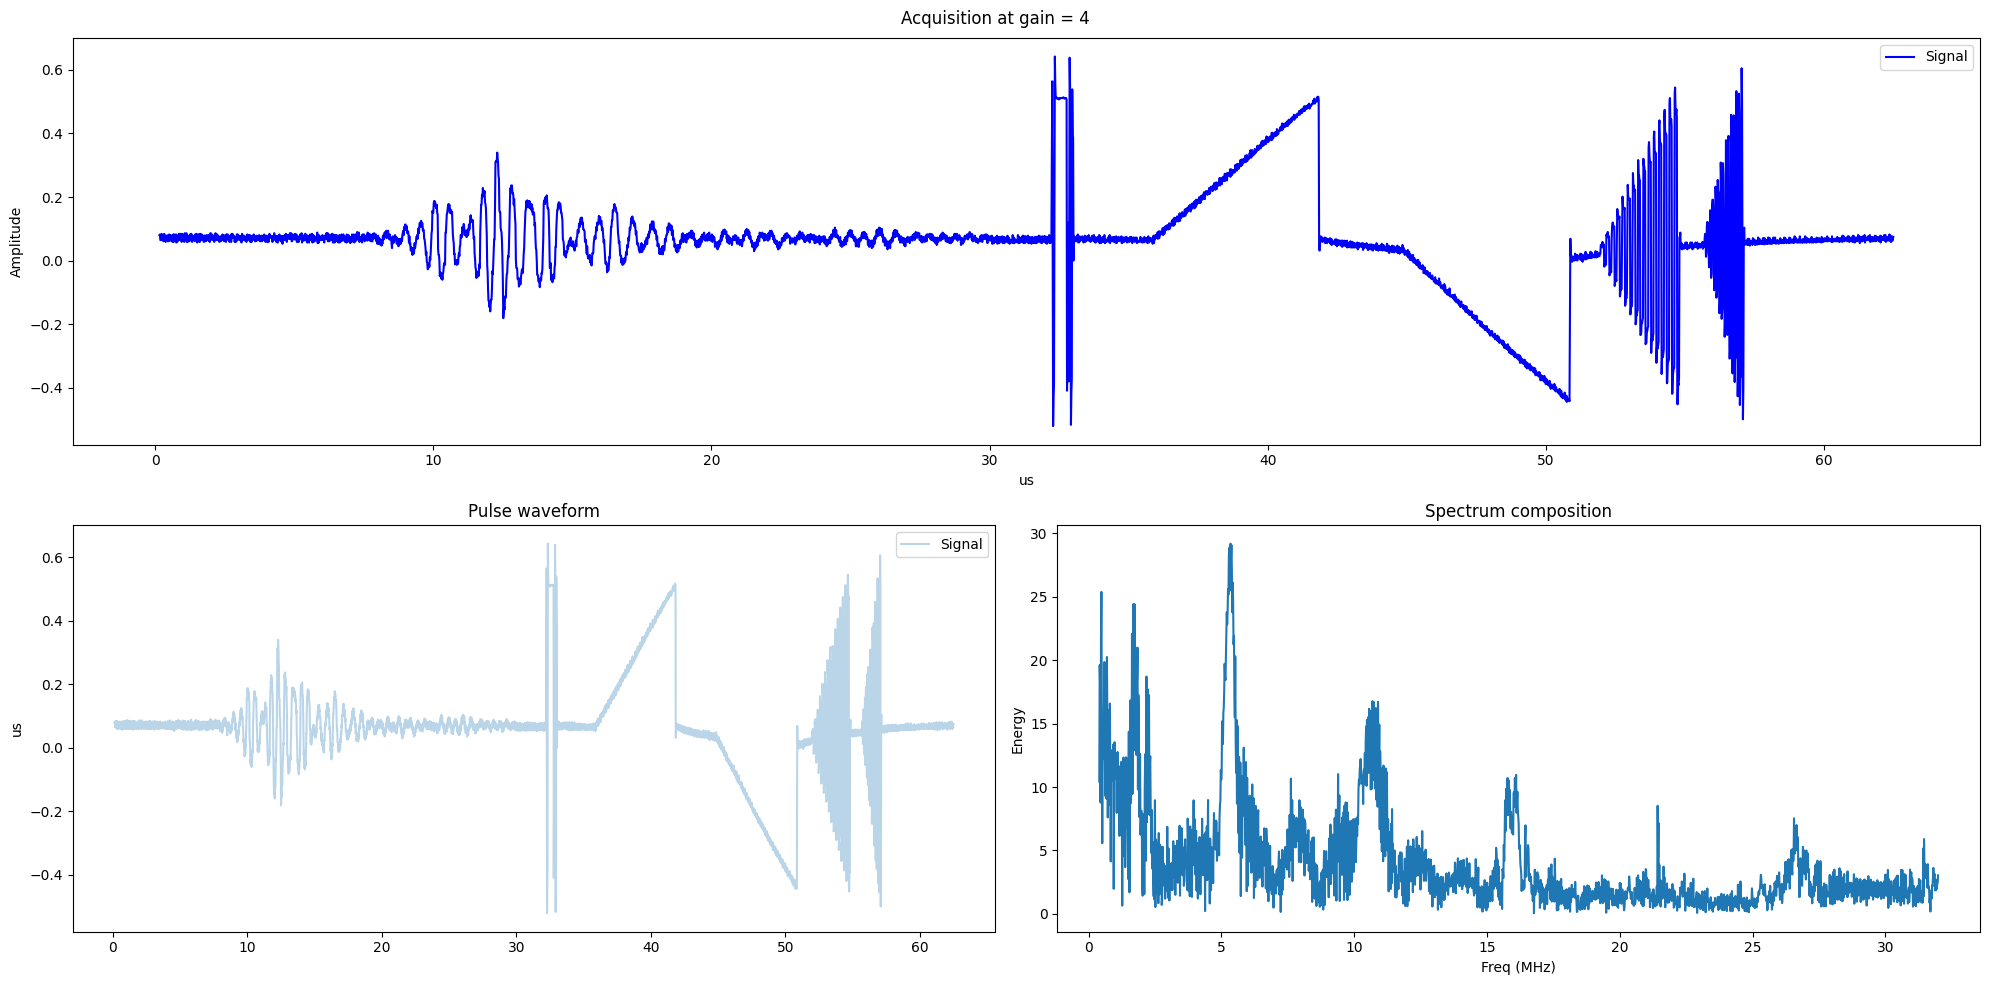

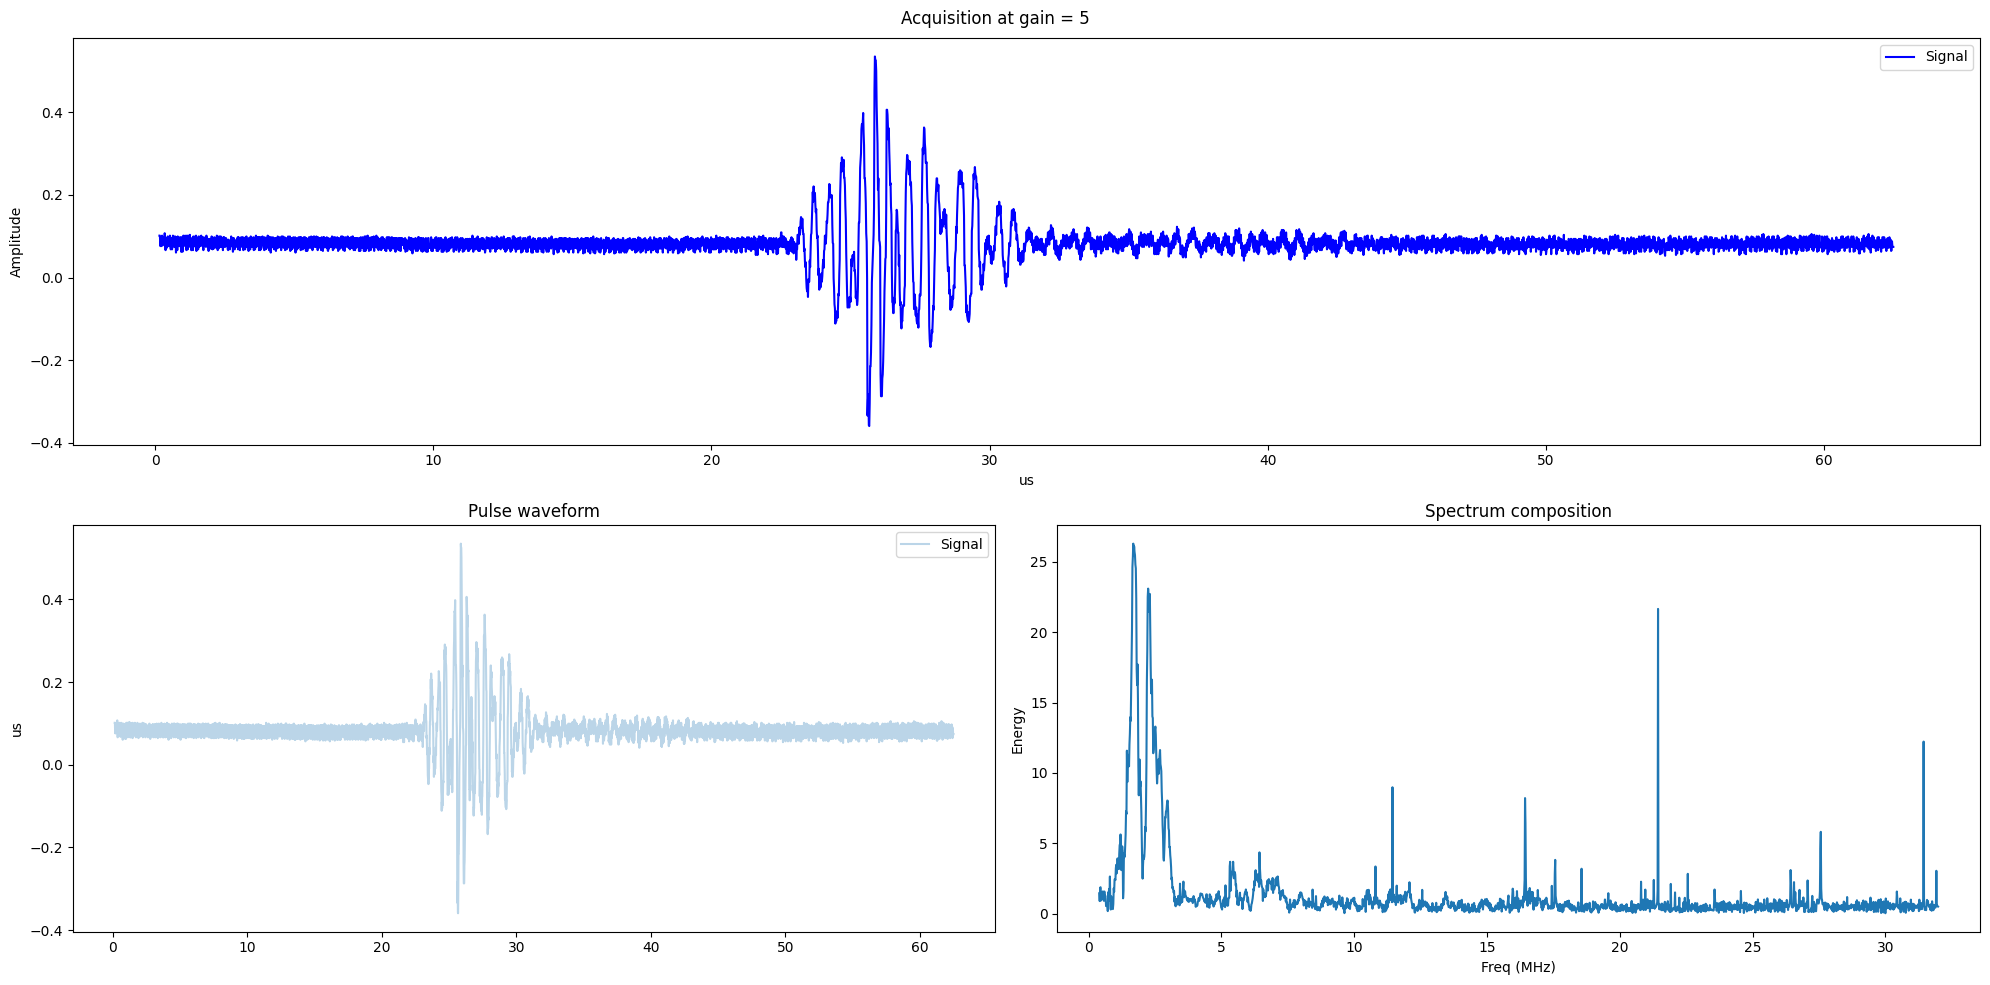

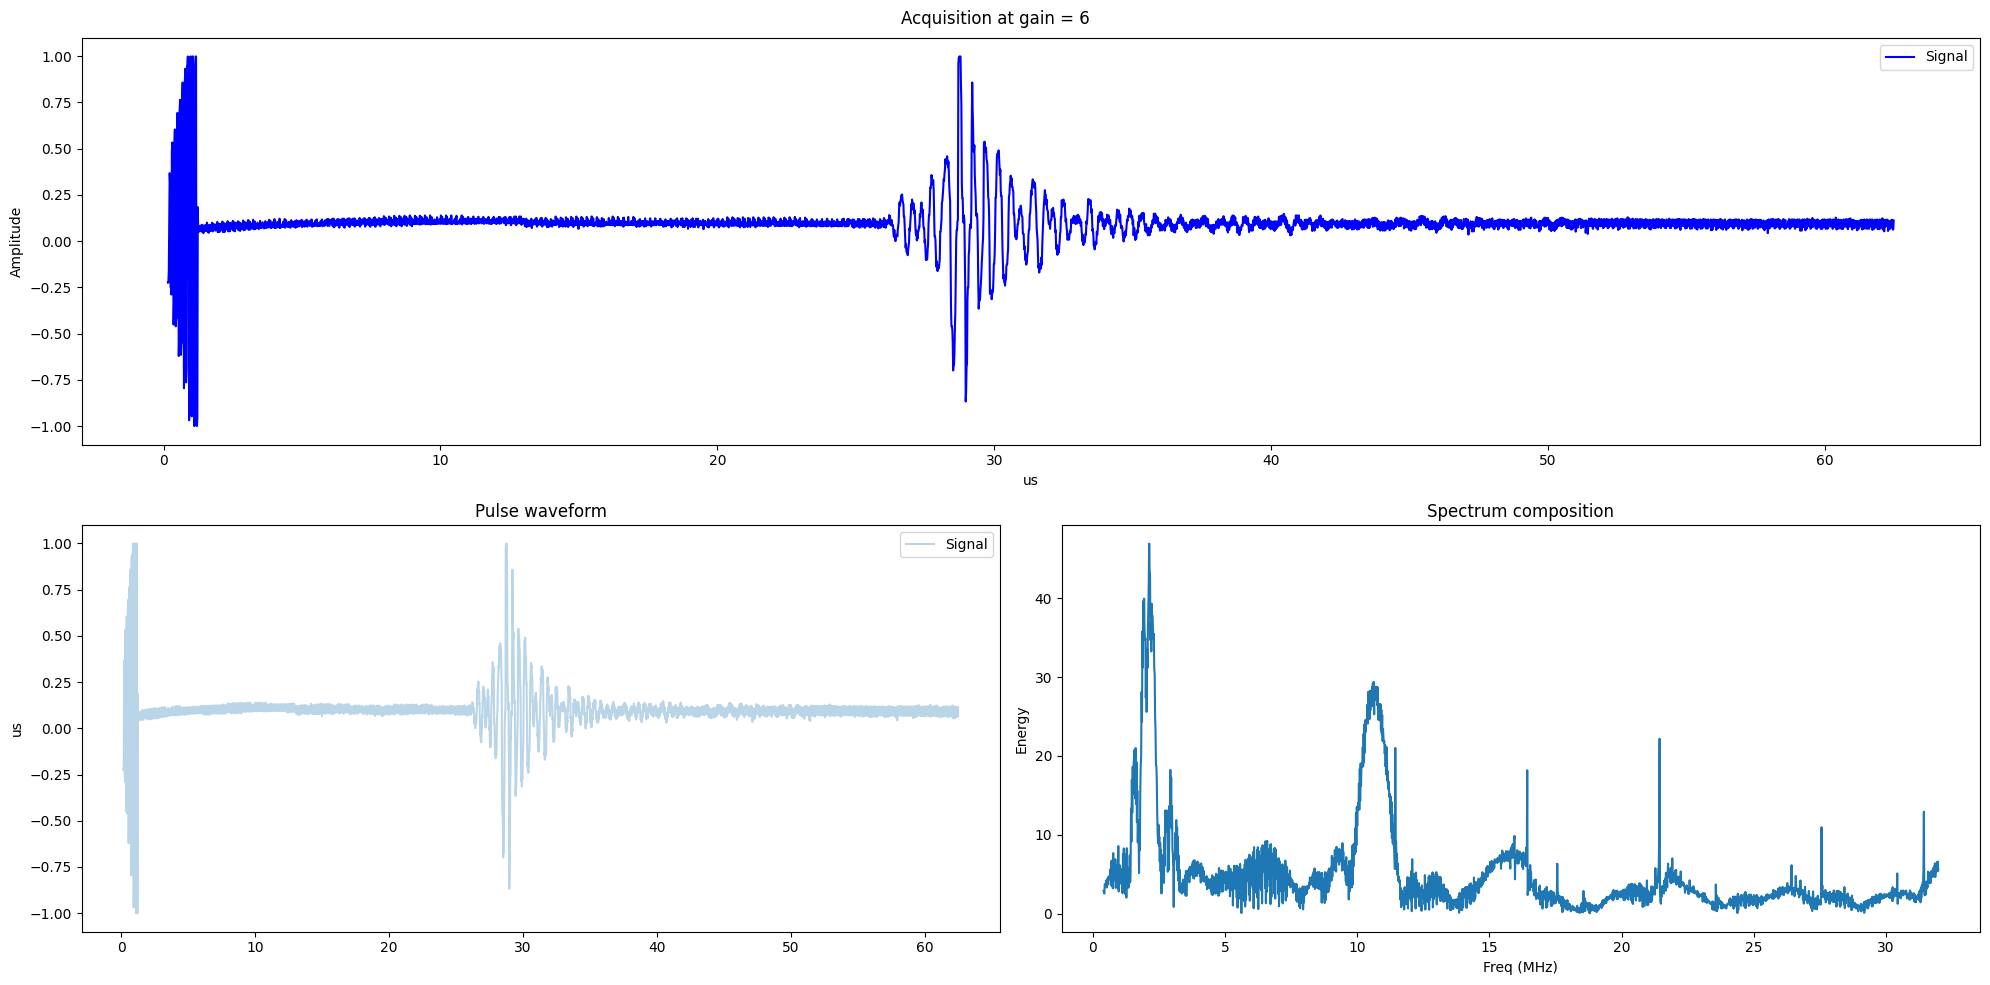

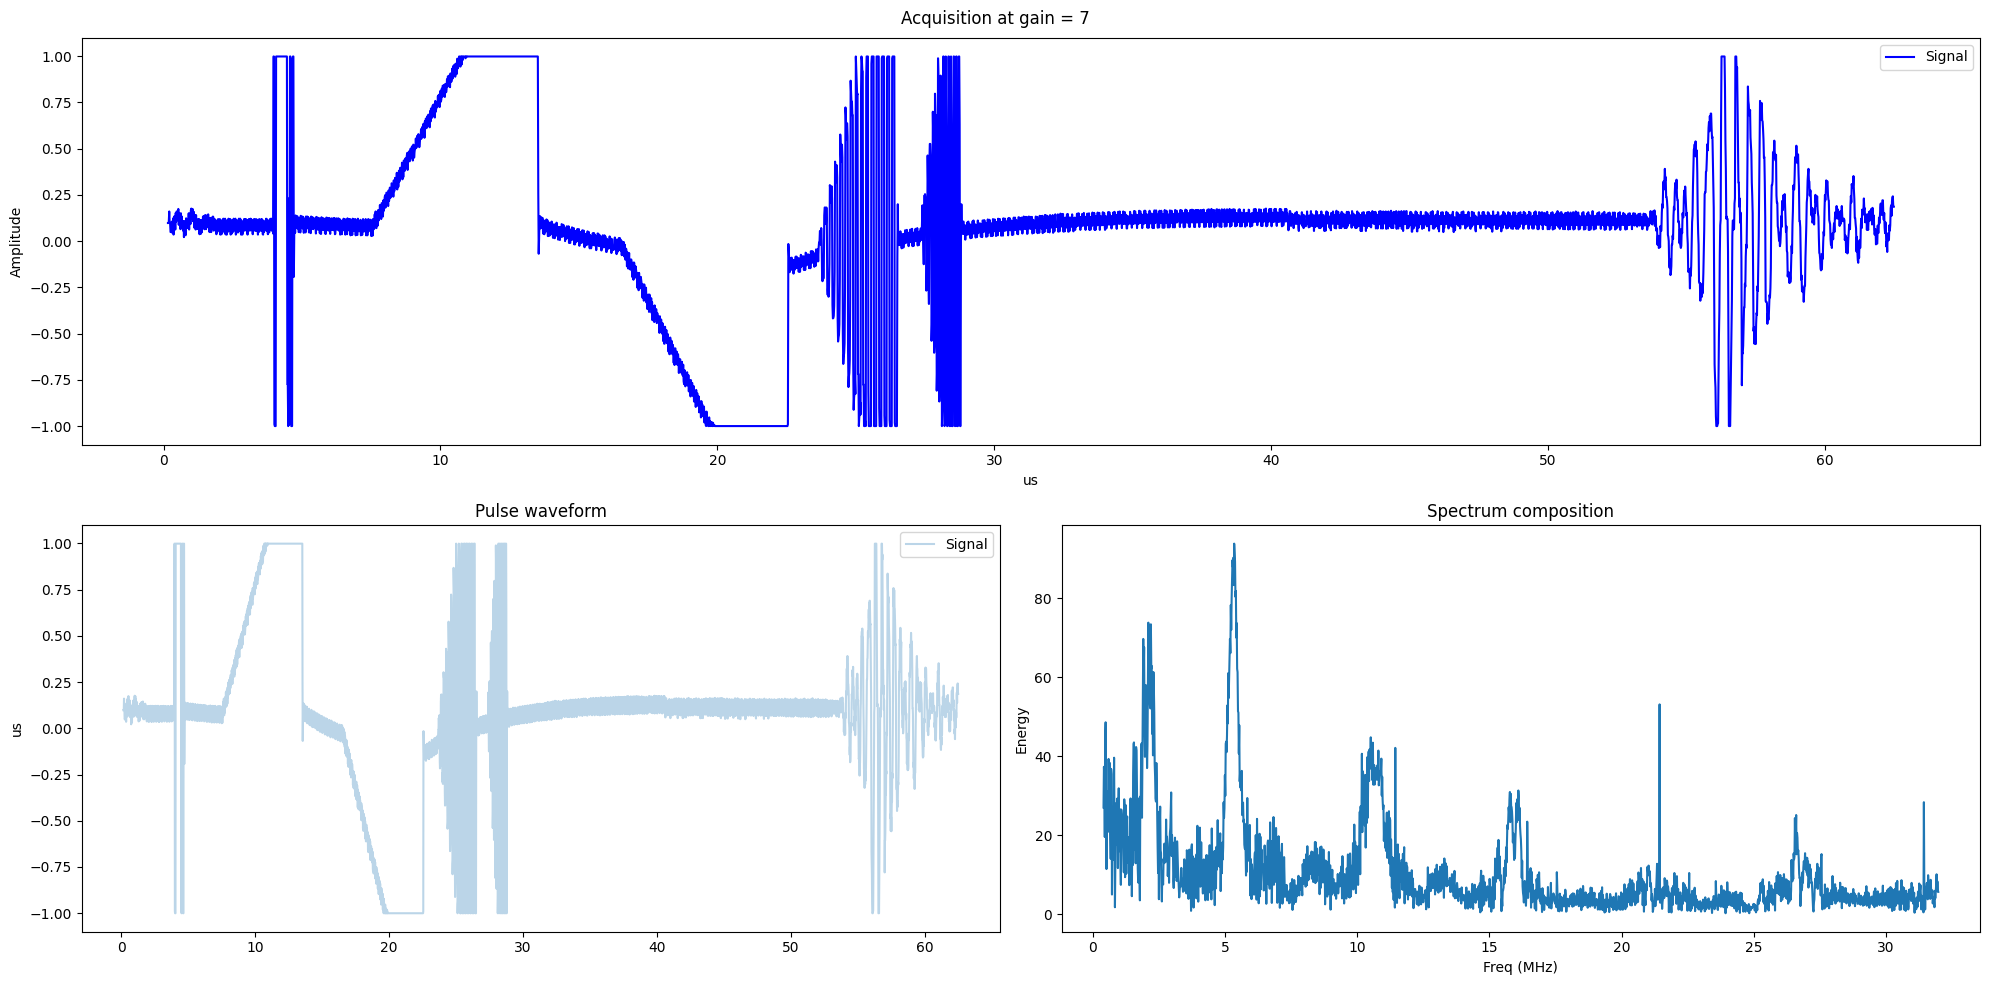

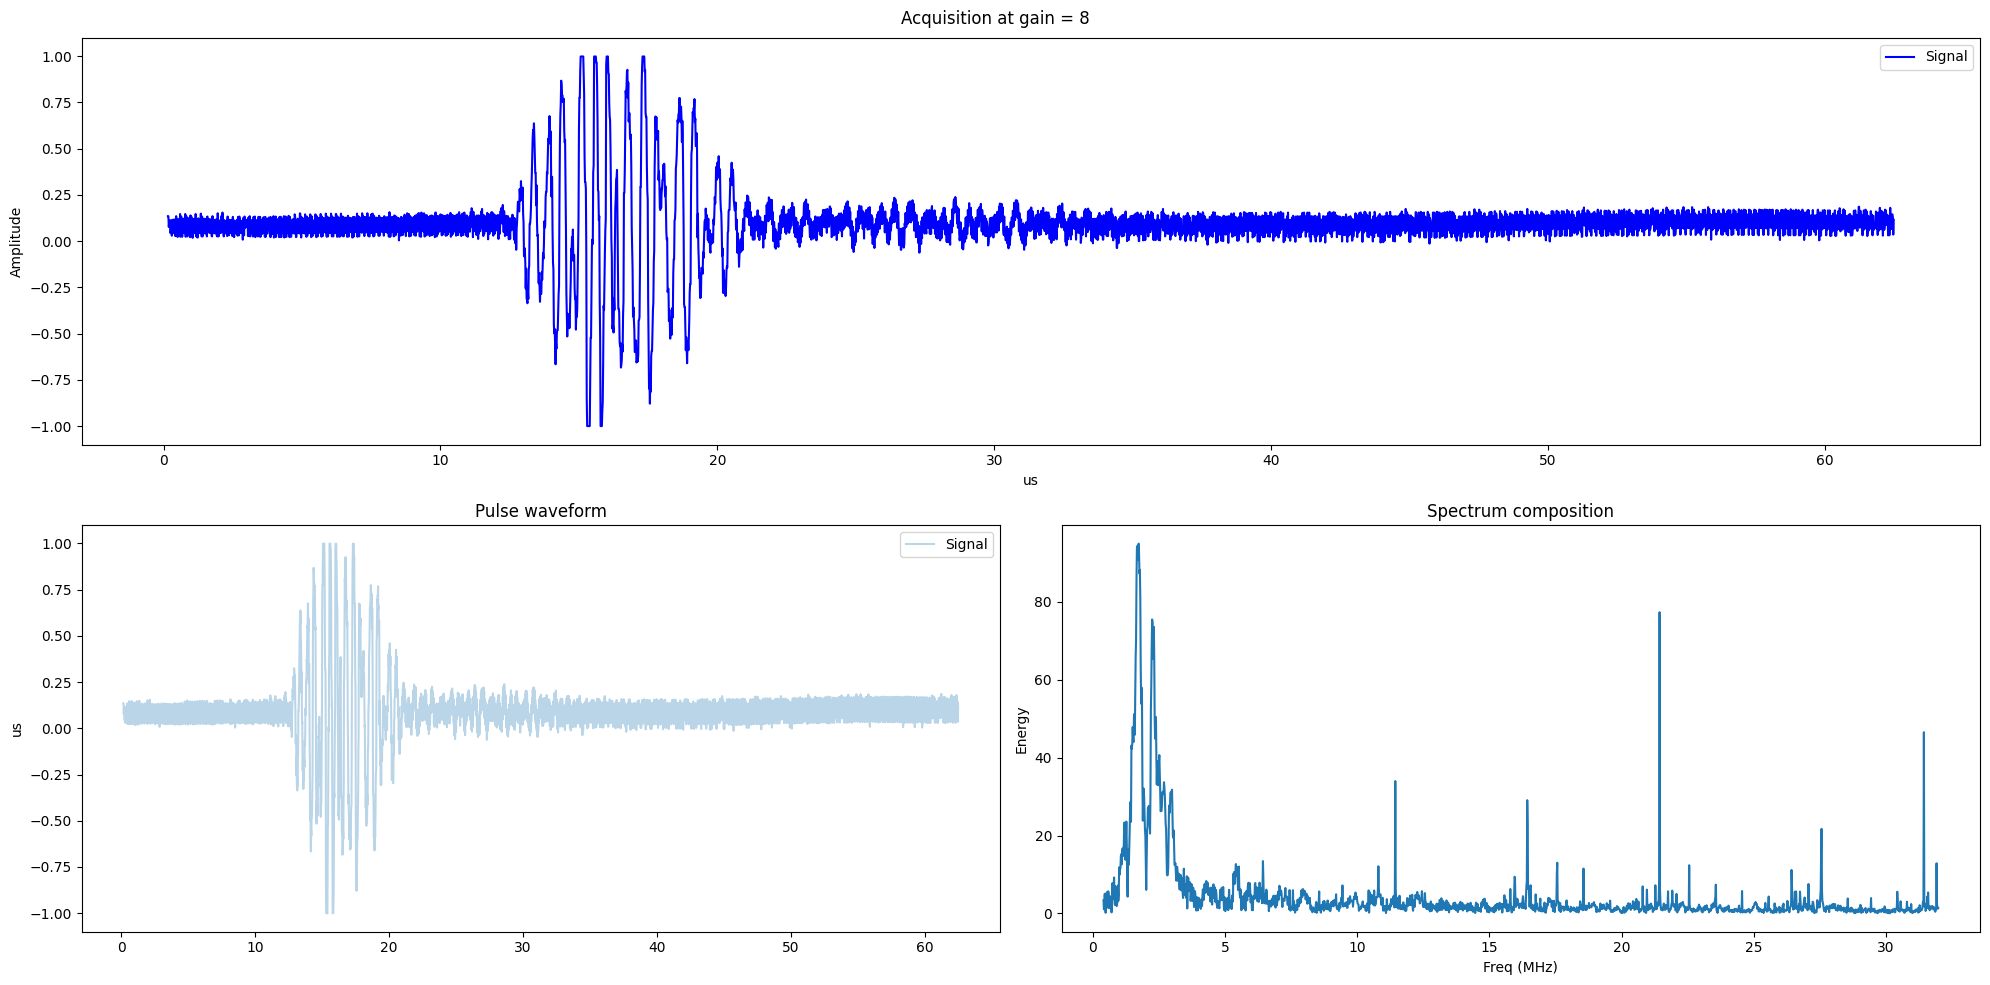

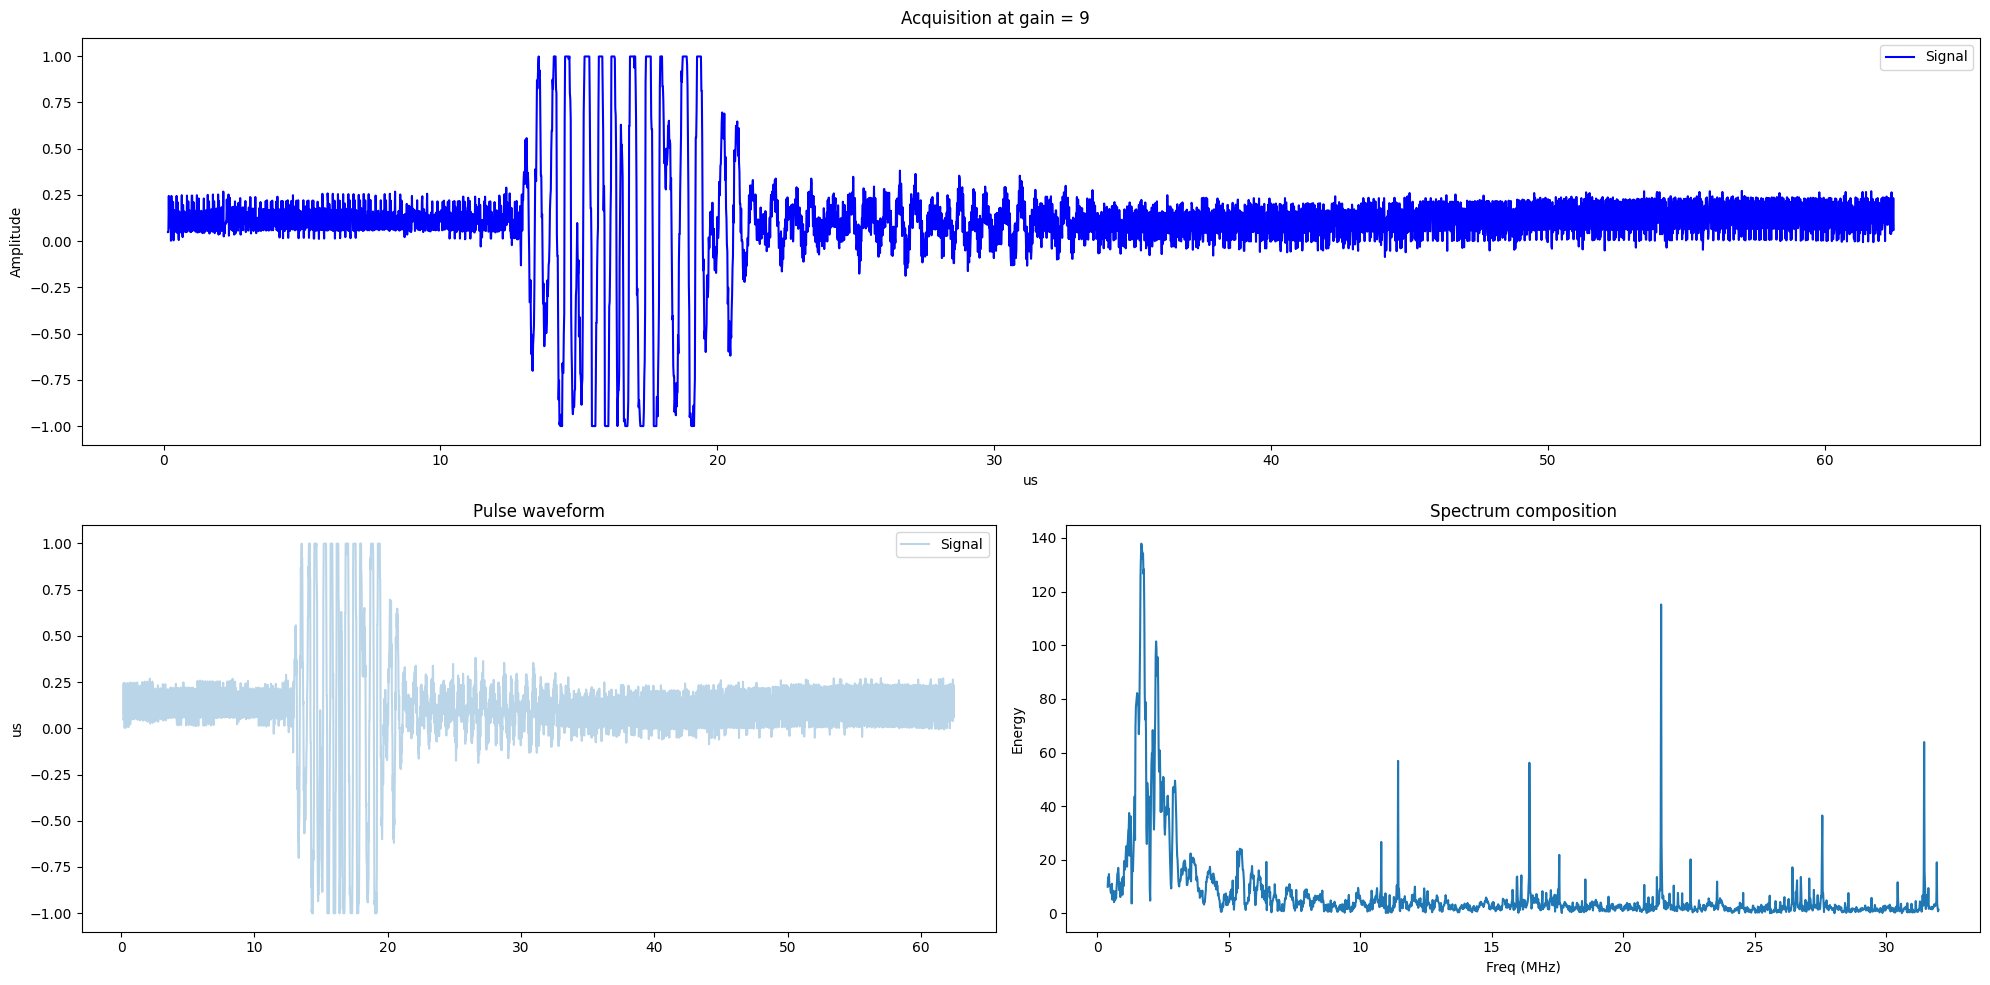

In [7]:
for G in range (10):
    ser.write(bytearray(str(G),'ascii'))
    ser.write(bytearray('1','ascii'))
    A = ser.readline()
    B = ser.readline()
    C = ser.readline()
    assert C == b'----------Start of ACQ----------\r\n'
    F = []
    while True: # Run forever

        read_ser=ser.readline()
        if (read_ser != b''):
            F.append(read_ser)
        else:
            break
    print("Check: ",G,len(F[0]) == 64002)

    now = datetime.datetime.today().strftime('%Y%m%d%H%M%S')
    S = str(F[0])[2:].split(",")[:-1]
    signal = [(int(x,16)-512)/512 for x in S]
    print(len(signal))
    t = [x/64.0 for x in range(len(signal))]
    f = [k*64/len(signal) for k in range(len(signal))]

    data = {"signal":signal,"t":t,"f":f,"gain":G,"timestamp":now}

    m=4000

    FFT = np.abs(np.fft.fft(signal))

    plt.figure(figsize=(20,10))
    plt.subplot(2, 1, 1)

    plt.plot(t[10:],signal[10:],"b",label="Signal")
    plt.xlabel("us")
    plt.ylabel("Amplitude")
    plt.legend()
    title = "Acquisition at gain = " + str(G)

    plt.subplot(2, 2, 3)
    plt.plot(t[10:m],signal[10:m],alpha=0.3,label="Signal")
    plt.title('Pulse waveform')
    plt.ylabel('V')
    plt.ylabel('us')
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.title('Spectrum composition')
    plt.plot(f[25:len(FFT)//2],FFT[25:len(FFT)//2])
    plt.xlabel('Freq (MHz)')
    plt.ylabel('Energy')

    plt.suptitle(title)
    plt.tight_layout()
    plt.savefig("imgs/dac2932/pic0gain_at_"+str(G)+".jpg")
    np.savez_compressed("imgs/dac2932/pic0gain_at_"+str(G), **data )

# Aligning to model

17.3 points
270 ns for 1 periods
Freq: 3.699421965317919
Corrected freq: 15.907514450867051


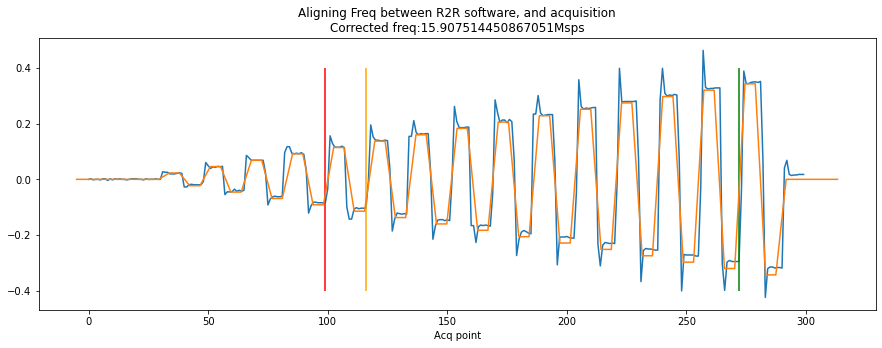

In [11]:
s = np.load("imgs/r2r/pic0gain_at_7.npz")["signal"]
t = np.load("imgs/r2r/pic0gain_at_7.npz")["t"]
plt.figure(figsize=(15,5))
plt.plot(s[5500:5800]-np.mean(s[5500:5510]))
plt.vlines(99,ymin=-0.4,ymax=0.4,colors=["red"])
plt.vlines(116,ymin=-0.4,ymax=0.4,colors=["orange"])
plt.vlines(272,ymin=-0.4,ymax=0.4,colors=["green"])
FACTOR = 4.3
plt.plot(4.3*np.array(range(1040-965))-5,(np.array(DATA[965:1040])-127)/350)

print((272-99)/10,"points")
T= t[5500+272]-t[5500+99]
print(int(T*100),"ns for 1 periods")
plt.xlabel("Acq point")
print("Freq:",1/(T/10.0)) #~16MHz
print("Corrected freq:",FACTOR/(T/10.0))

plt.title("Aligning Freq between R2R software, and acquisition\nCorrected freq:"+str(FACTOR/(T/10.0))+"Msps")
plt.savefig("r2r.jpg")

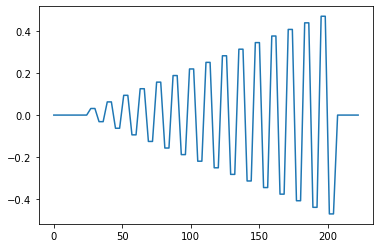